In [424]:
import numpy
import pandas
from matplotlib import pyplot
import seaborn
import plotly.express as px
from scipy import stats
from sklearn.metrics import r2_score

import plotly.io as pio
pio.renderers.default = "iframe"


In [425]:
""" Load Data """
df = pandas.read_csv('covid_19_clean_complete.csv' , parse_dates=['Date'])

# Lấy data của Trung
df_china = df[df['Country/Region'] == "China"]

df_china


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
48883,Tianjin,China,39.3054,117.3230,2020-07-27,204,3,195,6,Western Pacific
48884,Tibet,China,31.6927,88.0924,2020-07-27,1,0,1,0,Western Pacific
48885,Xinjiang,China,41.1129,85.2401,2020-07-27,311,3,73,235,Western Pacific
48886,Yunnan,China,24.9740,101.4870,2020-07-27,190,2,186,2,Western Pacific


In [426]:
# Lấy data của khu Hubei bên Trung
df_hubei = df[df['Province/State'] == "Hubei" ]

df_hubei


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
61,Hubei,China,30.9756,112.2707,2020-01-22,444,17,28,399,Western Pacific
322,Hubei,China,30.9756,112.2707,2020-01-23,444,17,28,399,Western Pacific
583,Hubei,China,30.9756,112.2707,2020-01-24,549,24,31,494,Western Pacific
844,Hubei,China,30.9756,112.2707,2020-01-25,761,40,32,689,Western Pacific
1105,Hubei,China,30.9756,112.2707,2020-01-26,1058,52,42,964,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
47824,Hubei,China,30.9756,112.2707,2020-07-23,68135,4512,63623,0,Western Pacific
48085,Hubei,China,30.9756,112.2707,2020-07-24,68135,4512,63623,0,Western Pacific
48346,Hubei,China,30.9756,112.2707,2020-07-25,68135,4512,63623,0,Western Pacific
48607,Hubei,China,30.9756,112.2707,2020-07-26,68135,4512,63623,0,Western Pacific


Khám Phá Dữ Liệu Của Toàn Bộ Trung

In [427]:
# 5 Dòng đầu
df_china.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific


In [428]:
# 5 dòng cuối
df_china.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48883,Tianjin,China,39.3054,117.3230,2020-07-27,204,3,195,6,Western Pacific
48884,Tibet,China,31.6927,88.0924,2020-07-27,1,0,1,0,Western Pacific
48885,Xinjiang,China,41.1129,85.2401,2020-07-27,311,3,73,235,Western Pacific
48886,Yunnan,China,24.9740,101.4870,2020-07-27,190,2,186,2,Western Pacific
48887,Zhejiang,China,29.1832,120.0934,2020-07-27,1270,1,1268,1,Western Pacific


In [429]:
# thông tin của dataframe
df_china.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6204 entries, 48 to 48887
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  6204 non-null   object        
 1   Country/Region  6204 non-null   object        
 2   Lat             6204 non-null   float64       
 3   Long            6204 non-null   float64       
 4   Date            6204 non-null   datetime64[ns]
 5   Confirmed       6204 non-null   int64         
 6   Deaths          6204 non-null   int64         
 7   Recovered       6204 non-null   int64         
 8   Active          6204 non-null   int64         
 9   WHO Region      6204 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 533.2+ KB


In [430]:
# mô tả dữ liệu
df_china.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
count,6204.000000,6204.000000,6204,6204.000000,6204.000000,6204.000000,6204.000000
mean,32.887645,111.785991,2020-04-24 12:00:00,2277.885558,108.383785,1848.302063,321.199710
min,19.195900,85.240100,2020-01-22 00:00:00,0.000000,0.000000,0.000000,-6.000000
25%,27.610400,107.874000,2020-03-08 18:00:00,130.000000,1.000000,45.000000,0.000000
50%,31.825700,113.550000,2020-04-24 12:00:00,254.000000,2.000000,172.000000,5.000000
75%,37.895700,117.323000,2020-06-10 06:00:00,788.000000,6.000000,597.000000,53.000000
max,47.862000,127.761500,2020-07-27 00:00:00,68135.000000,4512.000000,64435.000000,50633.000000
std,7.110380,9.335201,NaN,10856.271851,640.883595,9421.524170,2795.515548


Khám Phá Dữ Liệu Của Thành Phố Hubei Bên Trung

In [431]:
# 5 dòng đầu
df_hubei.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
61,Hubei,China,30.9756,112.2707,2020-01-22,444,17,28,399,Western Pacific
322,Hubei,China,30.9756,112.2707,2020-01-23,444,17,28,399,Western Pacific
583,Hubei,China,30.9756,112.2707,2020-01-24,549,24,31,494,Western Pacific
844,Hubei,China,30.9756,112.2707,2020-01-25,761,40,32,689,Western Pacific
1105,Hubei,China,30.9756,112.2707,2020-01-26,1058,52,42,964,Western Pacific


In [432]:
# 5 dòng cuối
df_hubei.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
47824,Hubei,China,30.9756,112.2707,2020-07-23,68135,4512,63623,0,Western Pacific
48085,Hubei,China,30.9756,112.2707,2020-07-24,68135,4512,63623,0,Western Pacific
48346,Hubei,China,30.9756,112.2707,2020-07-25,68135,4512,63623,0,Western Pacific
48607,Hubei,China,30.9756,112.2707,2020-07-26,68135,4512,63623,0,Western Pacific
48868,Hubei,China,30.9756,112.2707,2020-07-27,68135,4512,63623,0,Western Pacific


In [433]:
# thông tin của dataframe
df_hubei.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 61 to 48868
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  188 non-null    object        
 1   Country/Region  188 non-null    object        
 2   Lat             188 non-null    float64       
 3   Long            188 non-null    float64       
 4   Date            188 non-null    datetime64[ns]
 5   Confirmed       188 non-null    int64         
 6   Deaths          188 non-null    int64         
 7   Recovered       188 non-null    int64         
 8   Active          188 non-null    int64         
 9   WHO Region      188 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 16.2+ KB


In [434]:
# mô tả dữ liệu
df_hubei.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
count,1.880000e+02,1.880000e+02,188,188.000000,188.000000,188.000000,188.000000
mean,3.097560e+01,1.122707e+02,2020-04-24 12:00:00,61027.914894,3467.723404,49933.606383,7626.585106
min,3.097560e+01,1.122707e+02,2020-01-22 00:00:00,444.000000,17.000000,28.000000,0.000000
25%,3.097560e+01,1.122707e+02,2020-03-08 18:00:00,67734.000000,3002.500000,46174.750000,0.000000
50%,3.097560e+01,1.122707e+02,2020-04-24 12:00:00,68128.000000,4512.000000,63616.000000,17.500000
75%,3.097560e+01,1.122707e+02,2020-06-10 06:00:00,68135.000000,4512.000000,63623.000000,6799.000000
max,3.097560e+01,1.122707e+02,2020-07-27 00:00:00,68135.000000,4512.000000,64435.000000,50633.000000
std,3.562200e-15,1.424880e-14,NaN,18032.612893,1387.002207,23285.611460,14215.940829


Xử Lý Dữ Liệu Cho Toàn Bộ Bên Trung :
(Xử lý dữ liệu trống)   (Xử lý dữ liệu trùng lặp)

In [435]:
# Dếm số lượng trống
df_china.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [436]:
# Đếm số lượng trùng lặp
df_china.duplicated().sum()

np.int64(0)

Xử Lý Dữ Liệu Cho Thành Phố Hubei Của Trung :
(Xử lý dữ liệu trống)   (Xử lý dữ liệu trùng lặp)

In [437]:
# Dếm số lượng trống
df_hubei.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [438]:
# Đếm số lượng trùng lặp
df_hubei.duplicated().sum()

np.int64(0)

Visualize Data

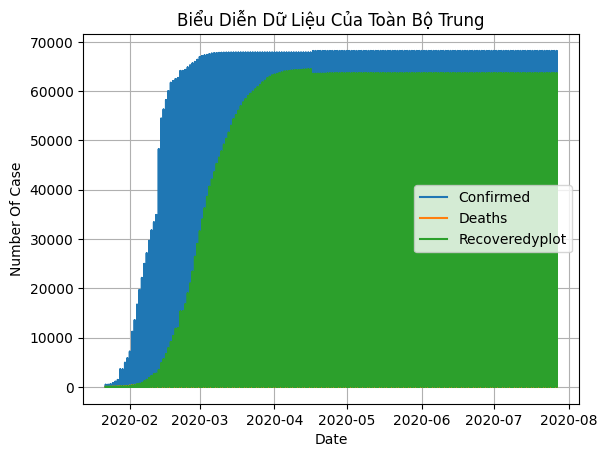

In [439]:
# Ở toàn bộ bên Trung
pyplot.plot(df_china["Date"], df_china["Confirmed"], label="Confirmed")
pyplot.plot(df_china["Date"], df_china["Deaths"], label="Deaths")
pyplot.plot(df_china["Date"], df_china["Recovered"], label="Recoveredyplot")
pyplot.xlabel("Date")
pyplot.ylabel("Number Of Case")
pyplot.legend()
pyplot.title("Biểu Diễn Dữ Liệu Của Toàn Bộ Trung")
pyplot.grid()
pyplot.show()

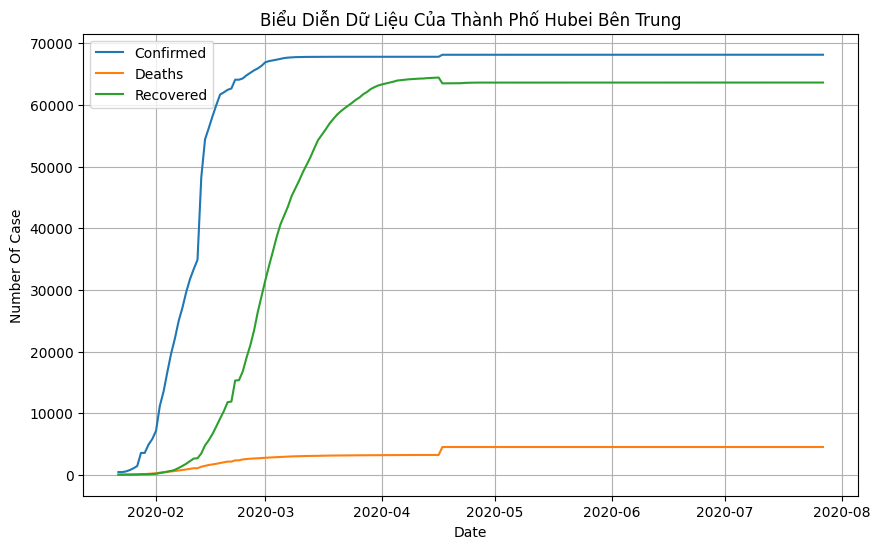

In [440]:
pyplot.figure(figsize=(10,6))
pyplot.plot(df_hubei["Date"], df_hubei["Confirmed"], label="Confirmed")
pyplot.plot(df_hubei["Date"], df_hubei["Deaths"], label="Deaths")
pyplot.plot(df_hubei["Date"], df_hubei["Recovered"], label="Recovered")
pyplot.xlabel("Date")
pyplot.ylabel("Number Of Case")
pyplot.legend()
pyplot.title("Biểu Diễn Dữ Liệu Của Thành Phố Hubei Bên Trung")
pyplot.grid()
pyplot.show()

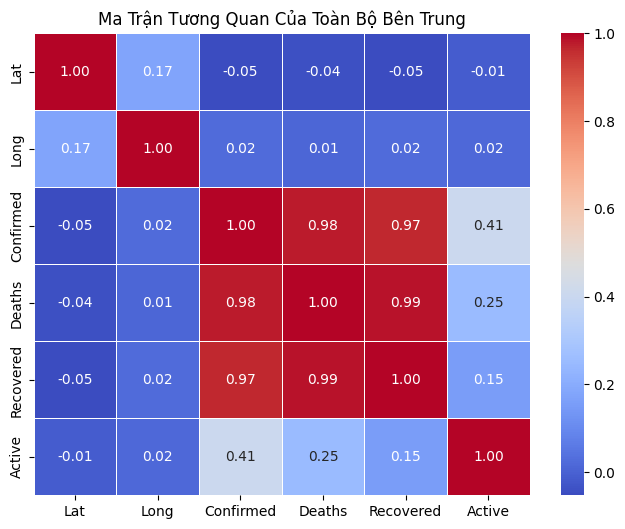

In [441]:
#---Ma trận tương quan ở toàn bộ bên Trung---
pyplot.figure(figsize=(8,6))
# Làm sạch dữ liệu
df_china_clean = df_china[['Lat' , 'Long' , 'Confirmed' , 'Deaths' , 'Recovered' , 'Active']]
corr_china = df_china_clean.corr()
seaborn.heatmap(corr_china , annot=True , cmap='coolwarm' , fmt=".2f", linewidths=.5)
pyplot.title("Ma Trận Tương Quan Của Toàn Bộ Bên Trung")
pyplot.show()

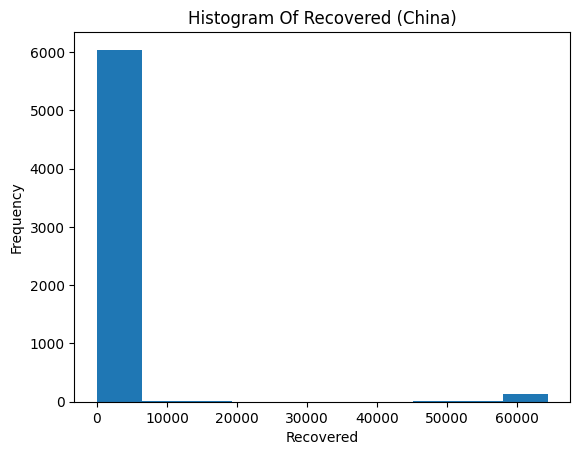

In [442]:
# Histogram
pyplot.hist(df_china['Recovered'])
pyplot.xlabel("Recovered")
pyplot.ylabel("Frequency")
pyplot.title("Histogram Of Recovered (China)")
pyplot.show()

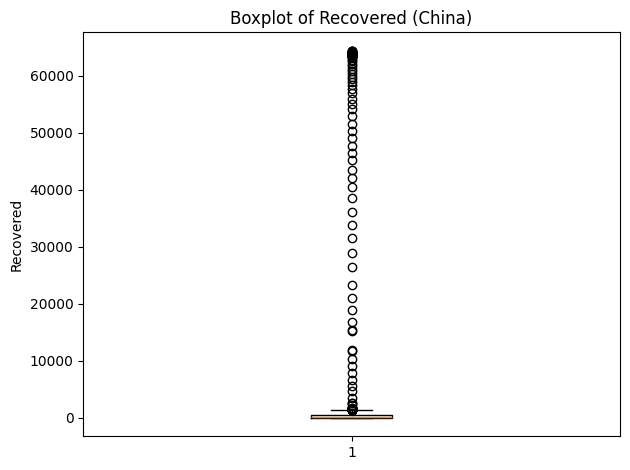

In [443]:
# Box Plot
pyplot.boxplot(df_china['Recovered'])
pyplot.title("Boxplot of Recovered (China)")
pyplot.ylabel("Recovered")
pyplot.tight_layout()

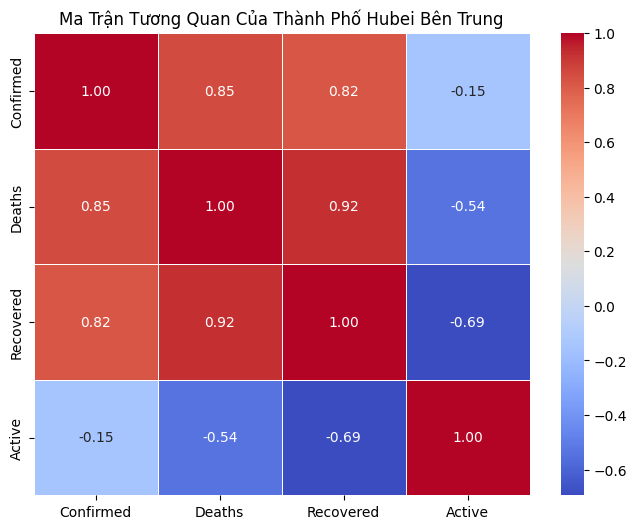

In [444]:
#---Ma trận tương quan ở thành phố Hubei bên Trung---
pyplot.figure(figsize=(8,6))
# Làm sạch dữ liệu
df_hubei_clean = df_hubei[[ 'Confirmed' , 'Deaths' , 'Recovered' , 'Active']]
corr_hubei = df_hubei_clean.corr()
seaborn.heatmap(corr_hubei , annot=True , cmap='coolwarm' , fmt=".2f", linewidths=.5)
pyplot.title("Ma Trận Tương Quan Của Thành Phố Hubei Bên Trung")
pyplot.show()

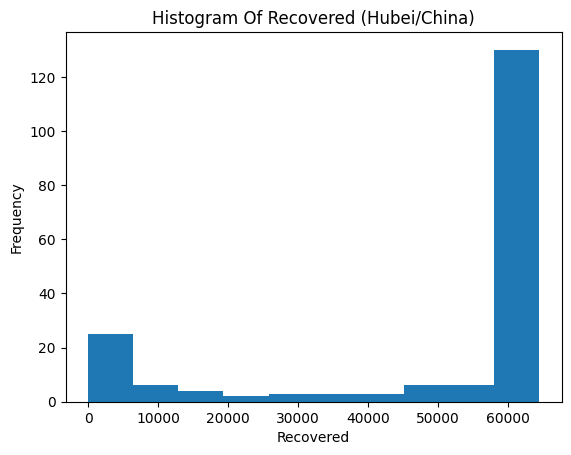

In [445]:
pyplot.hist(df_hubei['Recovered'])
pyplot.xlabel("Recovered")
pyplot.ylabel("Frequency")
pyplot.title("Histogram Of Recovered (Hubei/China)")
pyplot.show()

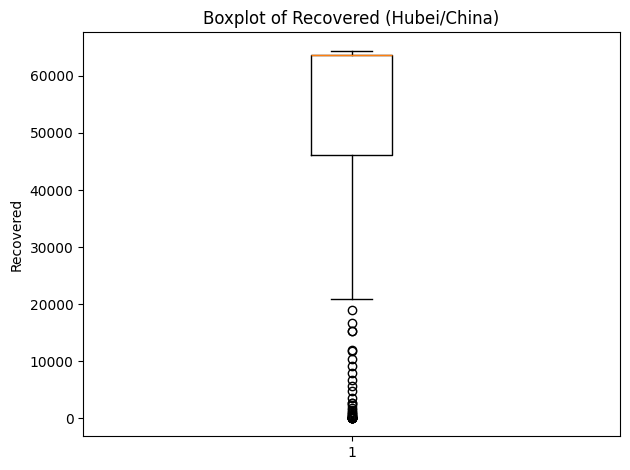

In [446]:
# Box Plot
pyplot.boxplot(df_hubei['Recovered'])
pyplot.title("Boxplot of Recovered (Hubei/China)")
pyplot.ylabel("Recovered")
pyplot.tight_layout()

Tính Toán Mean , Median , Mode  Cho Recovered

In [447]:
# Tính toán Mean Median Mode cho China
mean_china = numpy.mean(df_china['Recovered'])
print(f'Giá trị mean của recovered cho bên Trung là : {mean_china}')
median_china = numpy.median(df_china['Recovered'])
print(f'Giá trị median của recovered cho bên Trung là : {median_china}')
mode_china = stats.mode(df_china['Recovered'] )
print(f'Giá trị mode của recovered cho bên Trung là : {mode_china.count}')

Giá trị mean của recovered cho bên Trung là : 1848.302063185042
Giá trị median của recovered cho bên Trung là : 172.0
Giá trị mode của recovered cho bên Trung là : 648


In [448]:
# Tính toán Mean Median Mode cho Hubei
mean_hubei = numpy.mean(df_hubei['Recovered'])
print(f'Giá trị mean của recovered cho Hubei bên Trung là : {mean_hubei}')
median_hubei = numpy.median(df_hubei['Recovered'])
print(f'Giá trị median của recovered cho Hubei bên Trung là : {median_hubei}')
mode_hubei = stats.mode(df_hubei['Recovered'] )
print(f'Giá trị mode của recovered cho Hubei bên Trung là : {mode_hubei.count}')

Giá trị mean của recovered cho Hubei bên Trung là : 49933.60638297872
Giá trị median của recovered cho Hubei bên Trung là : 63616.0
Giá trị mode của recovered cho Hubei bên Trung là : 54


Tính STD Và SE

In [449]:
# Tính Std và Se cho toàn bộ Trung
std_china = numpy.std(df_china['Recovered'] , ddof=1)
print(f'Giá trị Std của recovered bên Trung là : {std_china}')
se_china = std_china / ( len(df_china['Recovered']) ** 0.5)
print(f'Giá trị Se của recovered bên Trung là : {se_china}')

Giá trị Std của recovered bên Trung là : 9421.524170447727
Giá trị Se của recovered bên Trung là : 119.61489738890499


In [450]:
# Tính Std và Se cho Hubei bên Trung
std_hubei = numpy.std(df_hubei['Recovered'] , ddof=1)
print(f'Giá trị Std của recovered bên Hubei là : {std_hubei}')
se_hubei = std_hubei / (len(df_hubei['Recovered']) ** 0.5)
print(f'Giá trị Se của recovered bên Hubei là : {se_hubei}')

Giá trị Std của recovered bên Hubei là : 23285.611460173935
Giá trị Se của recovered bên Hubei là : 1698.2777588307736


Khoảng Tin Cậy 95%

In [451]:
# Tính Ci cho Trung
z = 1.96
ci_china_upper = mean_china + z * se_china
ci_china_lower = mean_china - z * se_china
print(f"CI China : {ci_china_lower} -> {ci_china_upper}")

CI China : 1613.8568643027882 -> 2082.7472620672957


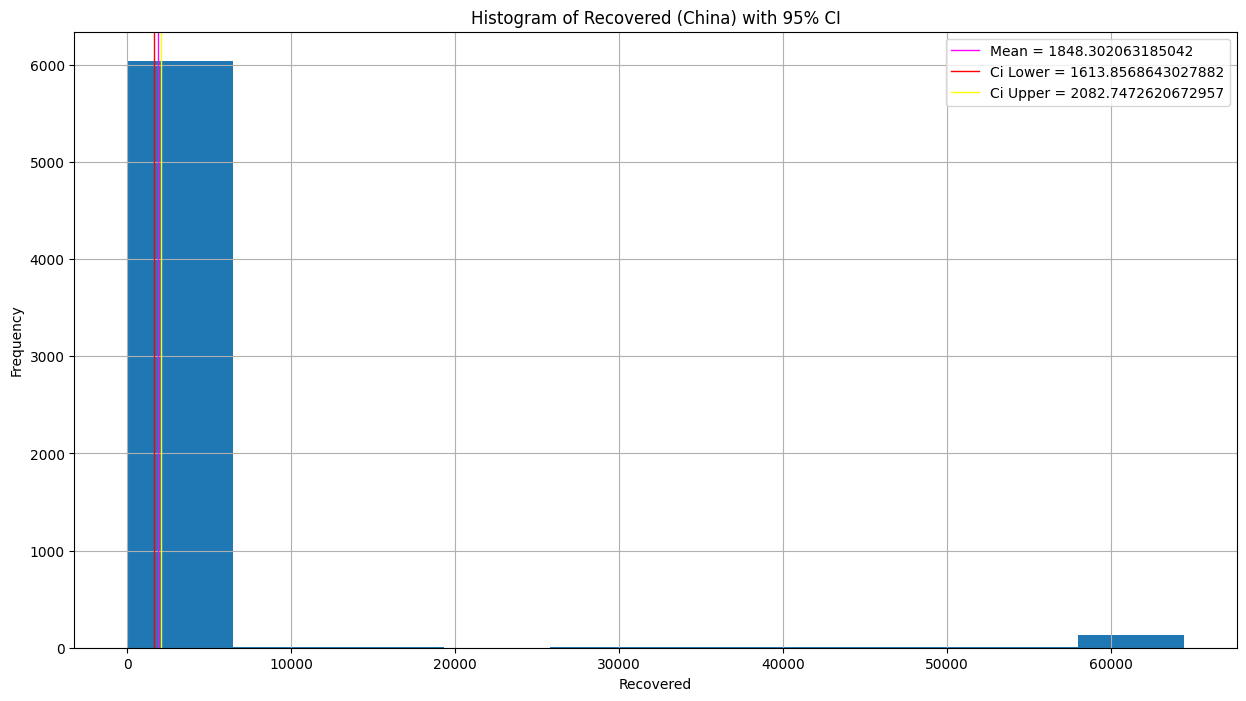

In [452]:
# Vẽ biểu đồ
pyplot.figure(figsize=(15,8))
pyplot.hist(df_china['Recovered'])
pyplot.axvline(mean_china , color='magenta' , linestyle='-' , linewidth=1 , label=f'Mean = {mean_china}')
pyplot.axvline(ci_china_lower , color='red' , linestyle='-' , linewidth=1 , label=f'Ci Lower = {ci_china_lower}')
pyplot.axvline(ci_china_upper , color='yellow' , linestyle='-' , linewidth=1 , label=f'Ci Upper = {ci_china_upper}')
pyplot.title("Histogram of Recovered (China) with 95% CI")
pyplot.xlabel("Recovered")
pyplot.ylabel("Frequency")
pyplot.legend()
pyplot.grid()
pyplot.show()

In [453]:
# Tính Ci cho Hubei
z = 1.96
ci_hubei_upper = mean_hubei + z * se_hubei
ci_hubei_lower = mean_hubei - z * se_hubei
print(f"CI Hubei : {ci_hubei_lower} -> {ci_hubei_upper}")

CI Hubei : 46604.98197567041 -> 53262.23079028704


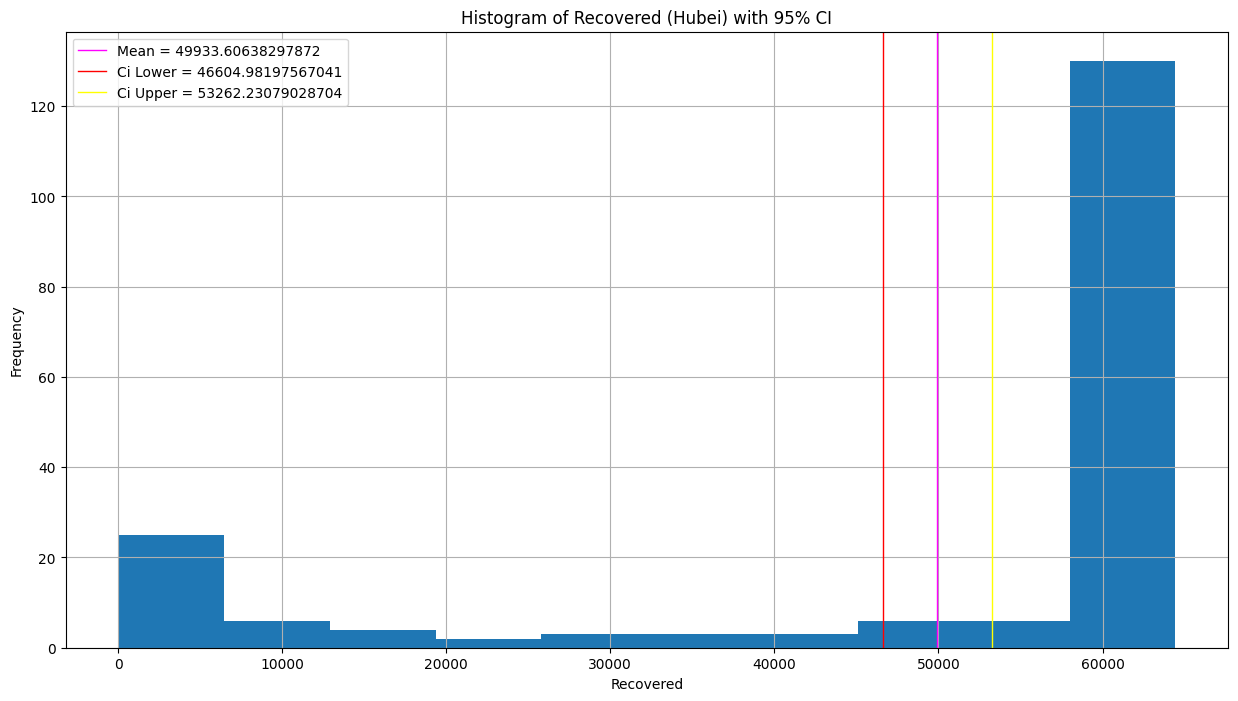

In [454]:
# Vẽ biểu đồ
pyplot.figure(figsize=(15,8))
pyplot.hist(df_hubei['Recovered'])
pyplot.axvline(mean_hubei , color='magenta' , linestyle='-' , linewidth=1 , label=f'Mean = {mean_hubei}')
pyplot.axvline(ci_hubei_lower , color='red' , linestyle='-' , linewidth=1 , label=f'Ci Lower = {ci_hubei_lower}')
pyplot.axvline(ci_hubei_upper , color='yellow' , linestyle='-' , linewidth=1 , label=f'Ci Upper = {ci_hubei_upper}')
pyplot.title("Histogram of Recovered (Hubei) with 95% CI")
pyplot.xlabel("Recovered")
pyplot.ylabel("Frequency")
pyplot.legend()
pyplot.grid()
pyplot.show()

Giả Thiết H0 : Tỷ lệ hồi phục ở Hubei bằng tỷ lệ hồi phục ở phần còn lại của Trung Quốc

In [455]:
total_confirm_hubei = df_hubei['Confirmed'].sum()
total_recover_hubei = df_hubei['Recovered'].sum()

recovery_rate_hubei = total_recover_hubei / total_confirm_hubei * 100
print(f"Recovery Rate : {recovery_rate_hubei:.2f}%")

Recovery Rate : 81.82%


Giả Thiết H1 : Tỷ lệ hồi phục ở Hubei khác với tỷ lệ hồi phục của Trung Quốc

In [456]:
total_confirm_china = df_china['Confirmed'].sum()
total_recover_china = df_china['Recovered'].sum()

recovery_rate_china = total_recover_china / total_confirm_china * 100
print(f"Recovery Rate China : {recovery_rate_china}")
print(f"Recovery Rate Hubei : {recovery_rate_hubei}")

Recovery Rate China : 81.14112919032986
Recovery Rate Hubei : 81.82092812776295


Linear Regression (Feature : Recovered , Deaths)

In [457]:
# Tính Linear Regression cho Trung 
x_china = df_china['Recovered']
y_china = df_china['Deaths']

X_china = numpy.array([x_china]).T

one = numpy.ones((x_china.shape[0],1))
X_china = numpy.concatenate((one , X_china) , axis=1)
X_china_T = X_china.T

A = numpy.dot(X_china_T , X_china)
b = numpy.dot(X_china_T , y_china)

w = numpy.dot(numpy.linalg.inv(A) , b)

print(f'y = {w[0]} + {w[1]}x')


y = -15.505170224645093 + 0.0670285216617775x


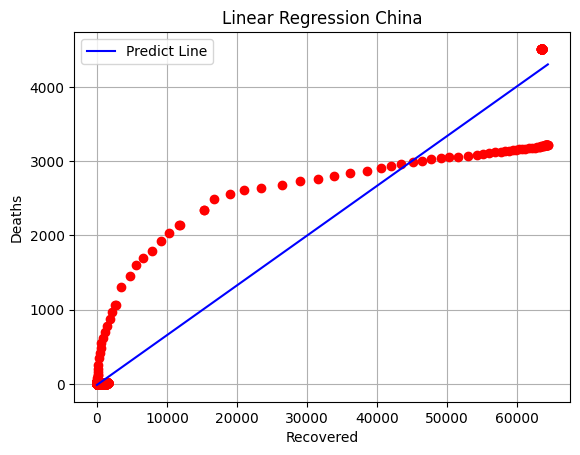

In [458]:
# Dự đoán mô hình
xp_china = numpy.linspace(x_china.min() , x_china.max() , 100)
yp_china = w[0] + w[1] * xp

# Biểu diễn mô hình
pyplot.plot(x_china , y_china , 'ro')
pyplot.plot( xp_china , yp_china , color='blue' , label="Predict Line")
pyplot.xlabel("Recovered")
pyplot.ylabel("Deaths")
pyplot.title("Linear Regression China")
pyplot.legend()
pyplot.grid()
pyplot.show()

In [459]:
# Tính Linear Regression cho Hubei
x_hubei = df_hubei['Recovered'].values.reshape(-1,1)
y_hubei = df_hubei['Deaths'].values.reshape(-1,1)

# tạo cột hệ số 1 (bias term)
one = numpy.ones((x_hubei.shape[0], 1))

# ghép thành ma trận thiết kế X
X_hubei = numpy.concatenate((one, x_hubei), axis=1)

X_hubei_T = X_hubei.T
A = numpy.dot(X_hubei_T, X_hubei)
b = numpy.dot(X_hubei_T, y_hubei)

w = numpy.dot(numpy.linalg.inv(A), b)

print(f'y = {w[0]} + {w[1]}x')


y = [716.5466944] + [0.0550967]x


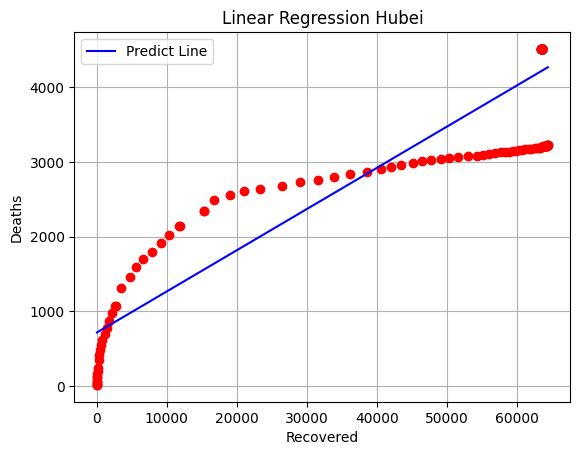

In [460]:
# Dự đoán mô hình
xp_hubei = numpy.linspace(x_hubei.min() , x_hubei.max() , 100)
yp_hubei = w[0] + w[1] * xp

# Biểu diễn mô hình
pyplot.plot(x_hubei , y_hubei , 'ro')
pyplot.plot( xp , yp , color='blue' , label="Predict Line")
pyplot.xlabel("Recovered")
pyplot.ylabel("Deaths")
pyplot.title("Linear Regression Hubei")
pyplot.legend()
pyplot.grid()
pyplot.show()